<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

В процессе изучения данных сделаем следущее:
* Изучим данные из файла
* Сделаем предобработку данных
* Проведем дополнительные расчеты и добавим их
* Исследуем анализ данных

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

В таблице видим много значений NaN

Выведем общую информацию о датафрейме:

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Посмотрим пропуски:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

NaN ,большое количество.

### Вывод

is_apartment - можно предположить, что "нет данных" там, где ответ - "0", т.е. это не апартаменты. Причиной может быть следующее:  люди особо не знают разницы между апартаментами и квартирами,  люди, которые продавали квартиры, при заполнении формы для создания объявления просто пропускали этот пункт, т.к. особо не понимали, что их спрашивали. И наоборот, владельцы апартаментов точно в курсе, что у них апартаменты (раз уж они их приобрели, значит, они разбираются в этом вопросе), поэтому по ним данные оказались заполненными. Взглянем на то, какие значения присутствуют. И решим, что с ними делать

parks_nearest, ponds_nearest - Эти данные не самые важные параметры,поэтому их просто могли пропустить, предлагаю здесь не трогать пропуски, т.к отсутствие возможности проставить какое-либо адекватные расстояние, которое не испортит статистику по уже присутствующим данным по этим столбцам,  учитывая, что есть достаточное количество строк, где данные присутствуют;

balcony - вполне возможно, что где балкон отсутствует, там вместо 0 стоит NaN. Необходимо проверить, действительно ли по столбцу balcony присутствует только значение "1", говорящее, что балкон есть, а "0" - отсутствует;

ceiling_height -   некоторые не считают это обязательным для заполнения пунктом,так как не знают высоту своих потолков, иначе бы данные присутствовали.   пропуски можно заполнить медианой ceiling_height по столбцу.

days_exposition -  Информация может отсутствовать,  по причине того, что неизвестно когда было закрыто объявление о продаже, т.е., фактически, сделка была совершена, но не была закрыта на онлайн-ресурсе. По той же причине можем получить результаты в виде срока продажи квартиры в несколько лет. Взять средний параметр или медиану не совсем правильно. Так как время продажи квартиры, это не средний возраст. Пропуски оставляем как есть

По airports_nearest, cityCenters_nearest: данные  полученыавтоматически на основе картографических данных. Они могут отустствовать по причине того, что относительно конкретно взятого населенного пункта  расстояние искались в определенном радиусе. Если в пределах этого радиуса нет аэропорта или парков , то указать в этом столбце системе было нечего. Оставляем как есть.

По parks_around3000, ponds_around3000: аналогично как и с parks_nearest и ponds_nearest - данные просто не были заполнены. Пропуски в них не трогаем;

kitchen_area, living_area - данные, которые могут быть не заполнены просто по той причине, что они не обязательны к заполнению,  потому что если квартира - студия, то там отсутствуют эти данные. Ведь в них нет явного деления площади на ту, которая относится к кухне, и ту, которая относится к жилой площади;

floors_total - Эти данные не обязательны к заполнению  при продаже квартиры, люди больше смотрят на этаж где находится квартира. Посмотрим сколько значений всего и  предлагаю заменить эти данные медианой.

locality_name -  странно конечно, когда не указывают населенный пункт. Но можно предположить, что когда выставляют квартиру на продажу в разделе сайта "Санкт-Петербург", то и квартира в Санкт-Петербурге. Тем не менее, заполним данные только по тем строкам, где указано расстояние до центра. Протяжённость Петербурга в административных границах: с севера на юг в пределах КАД — 32 км. Возмем радиус, тоесть будем учитывать, только те объявления где расстояния до центра не более 16 км.



## Предобработка данных

* выведем какие значения столбца "is_apartment" 

In [5]:
print('Количество NaN в столбце is_apartment:', data['is_apartment'].isnull().sum())
data['is_apartment'].value_counts()

Количество NaN в столбце is_apartment: 20924


False    2725
True       50
Name: is_apartment, dtype: int64

Присутствуют оба значения . 
Заполним пропуски значением False , т.к. в задании мы анализируем архив объявлений о продаже квартир. Всего 50 апартаментов, удалим эти строки. 

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(False )
print('Количество NaN в столбце is_apartment:', data['is_apartment'].isnull().sum())
data = data.loc[data['is_apartment'] != True,]
print(data['is_apartment'].value_counts())

Количество NaN в столбце is_apartment: 0
False    23649
Name: is_apartment, dtype: int64


* 'parks_nearest', 'ponds_nearest' парки, водоемы в радиусе 3км оставляем как есть, так как это не самые важные значения

In [7]:
# сколько значений NAN в столбцах 'parks_nearest' и 'ponds_nearest' 
print('Количество NaN по parks_nearest:', data['airports_nearest'].isnull().sum())
print('Количество NaN по ponds_nearest:', data['cityCenters_nearest'].isnull().sum())

Количество NaN по parks_nearest: 5533
Количество NaN по ponds_nearest: 5512


Оставим как есть

* 'balcony' - где данные отсутствуют, проставим нули - балкон отсутствует.

In [8]:
print('Количество NaN в столбце balcony:', data['balcony'].isnull().sum())
data['balcony'] = data['balcony'].fillna(0)
print('Количество NaN в столбце balcony:', data['balcony'].isnull().sum())

Количество NaN в столбце balcony: 11500
Количество NaN в столбце balcony: 0


 * 'ceiling_height' Заполним медианой по столбцу.

In [9]:
#Выведем количество NaN и уникальных значений
print(data['ceiling_height'].isnull().sum())
print(data['ceiling_height'].value_counts())

9189
2.50    3514
2.60    1643
2.70    1572
3.00    1103
2.80     988
        ... 
3.76       1
4.90       1
2.89       1
5.20       1
4.65       1
Name: ceiling_height, Length: 180, dtype: int64


In [10]:
hight = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(value=hight)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


* По 'airports_nearest', 'cityCenters_nearest': данные  полученым автоматически на основе картографических данных. Они могут отустствовать по причине того, что относительно конкретно взятого населенного пункта  расстояние искались в определенном радиусе. Если в пределах этого радиуса нет аэропорта или парков , то указать в этом столбце системе было нечего. Оставляем как есть,но при этом посмотрим их количество

In [11]:
# сколько значений NAN в столбцах  'airports_nearest' и 'cityCenters_nearest'
print('Количество NaN в столбце airports_nearest:', data['airports_nearest'].isnull().sum())
print('Количество NaN в столбце cityCenters_nearest:', data['cityCenters_nearest'].isnull().sum())

Количество NaN в столбце airports_nearest: 5533
Количество NaN в столбце cityCenters_nearest: 5512


Оставляем как есть.

* По 'parks_around3000', 'ponds_around3000': аналогично как и с parks_nearest и ponds_nearest - данные просто не были заполнены. Пропуски оставляем как есть,но при этом посмотрим их количество

In [12]:
# сколько значений NAN в столбцах  'parks_around3000' и'ponds_around3000' 
print('Количество NaN по parks_nearest:', data['parks_around3000'].isnull().sum())
print('Количество NaN по ponds_nearest:', data['ponds_around3000'].isnull().sum())

Количество NaN по parks_nearest: 5511
Количество NaN по ponds_nearest: 5511


Пропуски оставляем как есть.

* По 'kitchen_area', 'living_area' - данные, которые могут быть не заполнены просто по той причине, что они не обязательны к заполнению,  потому что если квартира - студия, то там отсутствуют эти данные. Ведь в них нет явного деления площади на ту, которая относится к кухне, и ту, которая относится к жилой площади.  Пропуски оставляем как есть, но при этом посмотрим их количество

In [13]:
# сколько значений NAN в столбцах  'kitchen_area' и 'living_area'
print('Количество NaN по kitchen_area:', data['kitchen_area'].isnull().sum())
print('Количество NaN по living_area:', data['living_area'].isnull().sum())

Количество NaN по kitchen_area: 2263
Количество NaN по living_area: 1895


* days_exposition -  Информация может отсутствовать,  по причине того, что неизвестно когда было закрыто объявление о продаже, т.е., фактически, сделка была совершена, но не была закрыта на онлайн-ресурсе. По той же причине можем получить результаты в виде срока продажи квартиры в несколько лет. Взять средний параметр или медиану не совсем правильно. Так как время продажи квартиры, это не средний возраст.Пропуски оставляем как есть, ,но при этом посмотрим их количество

In [14]:
# сколько значений NAN в столбцe 'days_exposition'
print('Количество NaN по days_exposition:', data['days_exposition'].isnull().sum())

Количество NaN по days_exposition: 3169


* locality_name - странно конечно, когда не указывают населенный пункт. Но можно предположить, что когда выставляют квартиру на продажу в разделе сайта "Санкт-Петербург", то и квартира в Санкт-Петербурге.Посмотрим их количество

In [15]:
print(data['locality_name'].value_counts())
print('Количество NaN по locality_name:', data['locality_name'].isnull().sum())

Санкт-Петербург            15682
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   397
Пушкин                       369
                           ...  
деревня Малая Романовка        1
деревня Иссад                  1
деревня Пикколово              1
деревня Кривко                 1
деревня Пельгора               1
Name: locality_name, Length: 363, dtype: int64
Количество NaN по locality_name: 49


Пропусков всего 49, заменим их на населенный пункт "Санкт-Петербург"

In [16]:
data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')
print('Количество NaN по locality_name:', data['locality_name'].isnull().sum())


Количество NaN по locality_name: 0


* floors_total - Смотрим количество уникальных значений и количество пропущенных

In [17]:
print(data['floors_total'].value_counts())
print('Количество NaN в столбце floors_total:', data['floors_total'].isnull().sum())

5.0     5780
9.0     3758
16.0    1375
12.0    1362
4.0     1186
10.0    1174
25.0    1075
6.0      909
17.0     833
3.0      662
7.0      588
14.0     553
18.0     505
24.0     469
8.0      389
2.0      382
15.0     364
23.0     351
19.0     339
22.0     286
20.0     270
13.0     228
11.0     201
27.0     163
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64
Количество NaN в столбце floors_total: 86


Всего 86 пропущенных значений, предлагаю заменить эти данные медианой.

In [18]:
floors = data['floors_total'].median()
data['floors_total'] = data['floors_total'].fillna(floors)
print('Количество NaN в столбце floors_total:', data['floors_total'].isnull().sum())

Количество NaN в столбце floors_total: 0


Посмотрим на изменения в таблице

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23649 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23649 non-null  int64  
 1   last_price            23649 non-null  float64
 2   total_area            23649 non-null  float64
 3   first_day_exposition  23649 non-null  object 
 4   rooms                 23649 non-null  int64  
 5   ceiling_height        23649 non-null  float64
 6   floors_total          23649 non-null  float64
 7   living_area           21754 non-null  float64
 8   floor                 23649 non-null  int64  
 9   is_apartment          23649 non-null  bool   
 10  studio                23649 non-null  bool   
 11  open_plan             23649 non-null  bool   
 12  kitchen_area          21386 non-null  float64
 13  balcony               23649 non-null  float64
 14  locality_name         23649 non-null  object 
 15  airports_nearest   

Пропущенных значений стало намного меньше. 

Приводим данные к нужным типам.


* total_images , тут ничего не меняем, данные в целочисленном типе
* last_price меняем, нам нужен целочисленный тип, тк врядли цена квартиры точна до десятых 
* total_area изменим до десятыхб площадь может измерятся в десятых после запятой
* first_day_exposition изменим в соответствии формата: дата.месяц.год
* rooms, тут ничего не меняем, данные в целочисленном типе      
* ceiling_height изменим до десятых, в высоте патолке важны каждые 10 см
* floors_total меняем, нам нужен целочисленный тип, пол этажа не может быть
* living_area изменим до десятыхб площадь может измерятся в десятых после запятой
* floor тут ничего не меняем, данные в целочисленном типе  
* is_apartment тут ничего не меняем, булево значение
* studio  тут ничего не меняем, булево значение
* open_plan не меняем булев тип 
* kitchen_area изменим до десятыхб площадь может измерятся в десятых после запятой
* balcony изменем в целочисленный тип, тк пол балкона не бывает
* locality_name не меняем, тип объект
* airports_nearest  меняем, нам нужен целочисленный тип, считаем расстояния без десятых метра
* cityCenters_nearest  меняем, нам нужен целочисленный тип, считаем расстояния без десятых метра
* parks_around3000 меняем, нам нужен целочисленный тип, считаем расстояния без десятых метра
* parks_nearest    меняем, нам нужен целочисленный тип, считаем расстояния без десятых метра
* ponds_around3000 меняем, нам нужен целочисленный тип, считаем расстояния без десятых метра
* ponds_nearest   меняем, нам нужен целочисленный тип, считаем расстояния без десятых метра
* days_exposition меняем, нам нужен целочисленный тип, десятых долей дня не будем считать


In [20]:
#приведения к типу int
list_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']

In [21]:
for column in list_int:
    data[column] = data[data[column].notnull()][column].astype('int')

In [22]:
#Столбцы, где округляем данные до десятого знака после запятой:
list_float = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']

In [23]:
for column in list_float:
    data[column] = data[data[column].notnull()][column].round(1)

In [24]:
#Выведем таблицу
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.7,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.6,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.6,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.6,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.0,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## Расчёты и добавление результатов в таблицу

Проведем расчет цены квадратного метра добавим его

In [25]:
data['price_m2'] = data['last_price'] / data['living_area']

 Изменим формат столбца first_day_exposition на datetime:

In [26]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Добавим день недели публикации объявления. Проставим день недели в формате числа (0 - понедельник, 6 - воскресенье):

In [27]:
data['weekday']= data['first_day_exposition'].dt.weekday

In [28]:
#Теперь создадим словарь, чтобы изменить значение с чисел на текст 
dict_weekdays = {0: ' понедельник', 1: ' вторник', 2: 'среда', 3: ' четверг', 
                    4: ' пятница', 5: ' суббота', 6: ' воскресенье'}

In [29]:
#Меняем значения:
data['weekday'] = data['weekday'].map(dict_weekdays)

Добавим год  публикации объявления:

In [30]:
data['year'] = data['first_day_exposition'].apply(lambda x: x.year)

Добавим месяц публикации объявления:

In [31]:
data['month'] = data['first_day_exposition'].apply(lambda x: x.month)

Распределим этаж квартиры

In [32]:
data['floor_categoria'] = np.where(data['floor'] == 1, 'первый', 'другой')
data['floor_categoria'] = np.where(data['floor'] == data['floors_total'], 'последний', data['floor_categoria'])

Добавим столбцы с соотношением жилой и общей площади, а также с отношением площади кухни к общей.

In [33]:
data['living_area_attitude'] = data['living_area']/data['total_area']
data['kitchen_area_attitude'] = data['kitchen_area']/data['total_area']

In [34]:
#выведем таблицу
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,year,month,floor_categoria,living_area_attitude,kitchen_area_attitude
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,2.0,755.0,NaN,254901.960784,четверг,2019,3,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,False,...,0.0,NaN,81.0,180107.526882,вторник,2018,12,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,False,...,2.0,574.0,558.0,151486.880466,четверг,2015,8,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,False,...,3.0,234.0,424.0,NaN,пятница,2015,7,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,1.0,48.0,121.0,312500.000000,вторник,2018,6,другой,0.320000,0.410000
5,10,2890000,30.4,2018-09-10,1,2.6,12,14.4,5,False,...,NaN,NaN,55.0,200694.444444,понедельник,2018,9,другой,0.473684,0.299342
6,6,3700000,37.3,2017-11-02,1,2.6,26,10.6,6,False,...,0.0,NaN,155.0,349056.603774,четверг,2017,11,другой,0.284182,0.386059
7,5,7915000,71.6,2019-04-18,2,2.6,24,NaN,22,False,...,0.0,NaN,NaN,NaN,четверг,2019,4,другой,NaN,0.263966
8,20,2900000,33.2,2018-05-23,1,2.6,27,15.4,26,False,...,NaN,NaN,189.0,188311.688312,среда,2018,5,другой,0.463855,0.265060
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,False,...,0.0,NaN,289.0,123853.211009,воскресенье,2017,2,другой,0.714754,0.106557


## Исследовательский анализ данных

4.1 Изучем следующие параметры: площадь, цена, число комнат, высота потолков.

In [35]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23649.000000,2.364900e+04,23649.000000,23649.000000
mean,60.300055,6.528054e+06,2.070616,2.700858
std,35.516638,1.086966e+07,1.078139,0.733050
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.644000e+06,2.000000,2.600000
75%,69.700000,6.780000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,32.000000


по площади есть как квартира 12 кв.м., так и 900 кв.м. В среднем 60 м2;
по цене за квартиру - есть варианты и за 12 тысяч рублей, есть за 763 млн;
число комнат - от 0  до 19. Возможно, это нежилые помещения;
высота потолков - от 1 до 100 метров.

[[<AxesSubplot:title={'center':'total_area'}>]]
[[<AxesSubplot:title={'center':'last_price'}>]]
[[<AxesSubplot:title={'center':'rooms'}>]]
[[<AxesSubplot:title={'center':'ceiling_height'}>]]


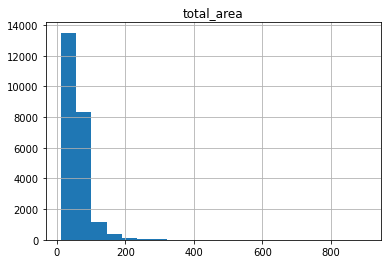

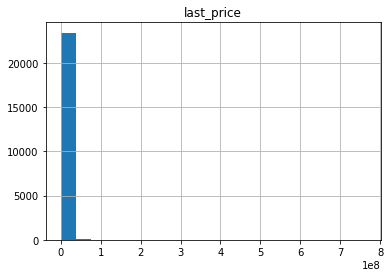

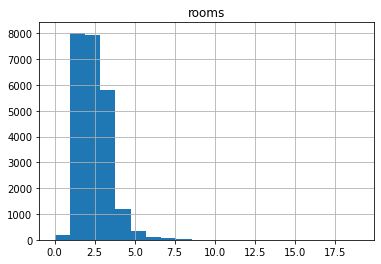

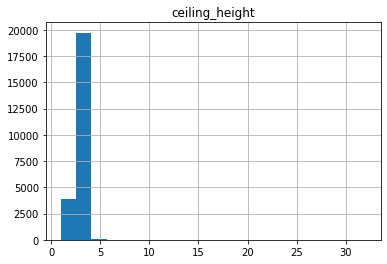

In [36]:
#Построим гистограмму для площади
#Построим гистограмму для цены
#Построим гистограмму для числа комнат
#Построим гистограмму для высоты потолка
print(data.hist('total_area', bins=20))
print(data.hist('last_price', bins=20))
print(data.hist('rooms', bins=20))
print(data.hist('ceiling_height', bins=20))

4.2 Изучем время продажи квартиры

In [37]:
display(data['days_exposition'].describe())
display(data['days_exposition'].median())

count    20480.000000
mean       180.744189
std        219.281202
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

95.0

В среднем продажа квартиры занимает 180 дней, а по медиане 95 дней. Что очень даже не плохо для продажи квартиры. Максимальное время продаж занимает 1580 дней, возможно это квартира за 900 миллионов

<AxesSubplot:>

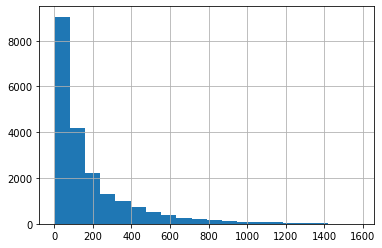

In [38]:
data['days_exposition'].hist(bins=20)

<AxesSubplot:>

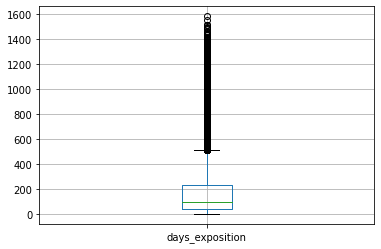

In [39]:
#Построим боксплот, чтобы визуально посмотреть
data.boxplot(column='days_exposition')

Ограничу срок продажи 500 днями, чтоб убрать редкие и выбивающие значения.

<AxesSubplot:>

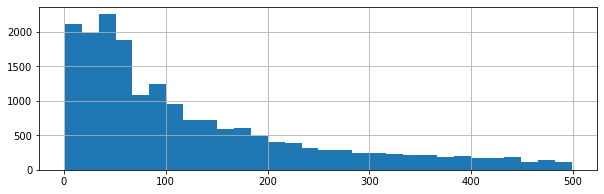

In [40]:
data.query('days_exposition<500')['days_exposition'].hist(bins=30, figsize=(10,3))

На первый взгляд нет выбивающих значений, ограничим срок продажи до 500 дней 

4.3 Уберем редкие и выбивающие значения. Что бы их найти для этого ограничим срок продажи до 250 дней

<AxesSubplot:>

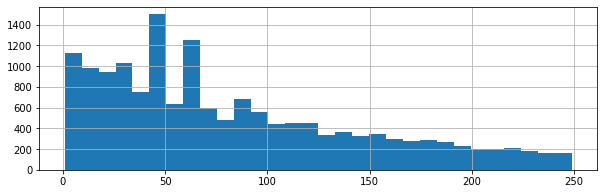

In [41]:
data.query('days_exposition<250')['days_exposition'].hist(bins=30, figsize=(10,3))

Вот они и пики по ним видно, что чаще всего квартиры продаются в срок от 40 до 65 дней.Посмотрим значения которые входят в этот диапозон.

<AxesSubplot:>

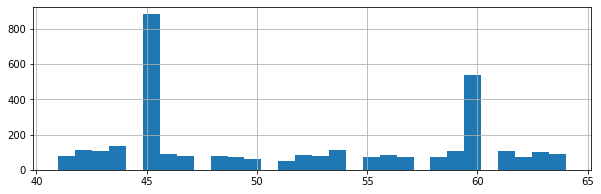

In [42]:
data.query('40<days_exposition<65')['days_exposition'].hist(bins=30, figsize=(10,3))

Больше всего квартир продается на 45 день и на 60 день, можно предположить что программа самостоятельно закрывает объявления, поэтому такое большое количество приходится на эти дни.

<AxesSubplot:>

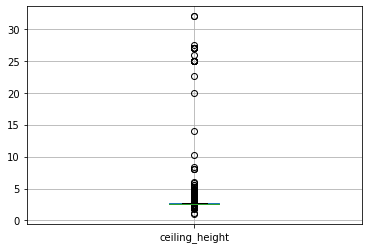

In [43]:
#Построим боксплот, чтобы визуально посмотреть на выбросы
data.boxplot(column='ceiling_height')

 Предлагаю удалить редкие и выбивающие значения 'ceiling_height' и посмотреть на гистограмму '2,25 < ceiling_height <= 3'

AxesSubplot(0.125,0.125;0.775x0.755)


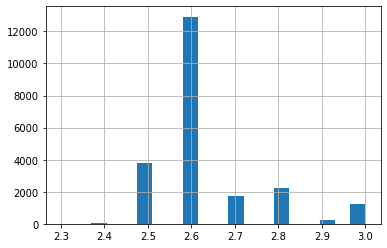

In [44]:
print(data.query('2.25 <ceiling_height <= 3')['ceiling_height'].hist( bins=20))

<AxesSubplot:>

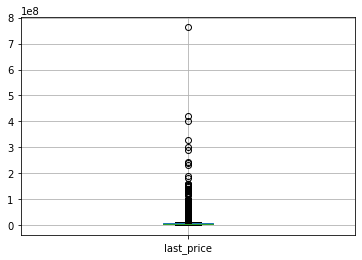

In [45]:
#Построим боксплот, чтобы визуально посмотреть на выбросы
data.boxplot(column='last_price')

 Выбросов очень много. Предлагаю удалить редкие и выбивающие значения 'last_price' и посмотреть на гистограмму '3000000 < last_price <= 10000000'

AxesSubplot(0.125,0.125;0.775x0.755)


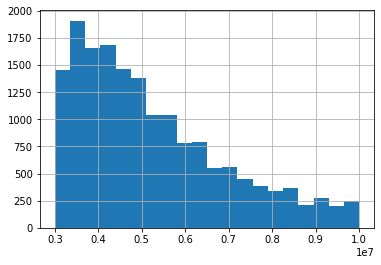

In [46]:
print(data.query('3000000 < last_price <= 10000000')['last_price'].hist( bins=20))

4.4 Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.


Смотрим зависимость цены от количества комнат:

<AxesSubplot:title={'center':'rooms'}, xlabel='rooms'>

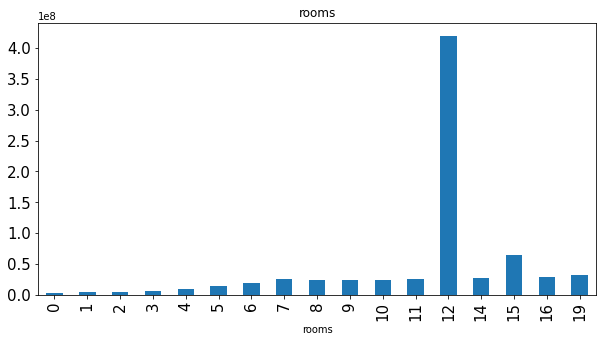

In [47]:
data_rooms = data.groupby('rooms').median()['last_price']
data_rooms.plot(x='rooms', y='last_price', kind='bar',figsize=(10,5), title='rooms', legend=None, fontsize=15 )   


<AxesSubplot:>

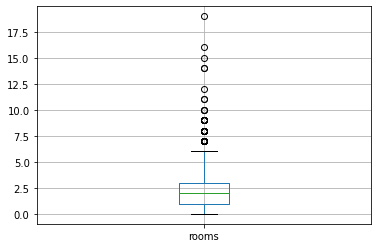

In [48]:
#Посмотрим на выбросы:
data.boxplot(column='rooms')

<AxesSubplot:title={'center':'rooms'}, xlabel='rooms'>

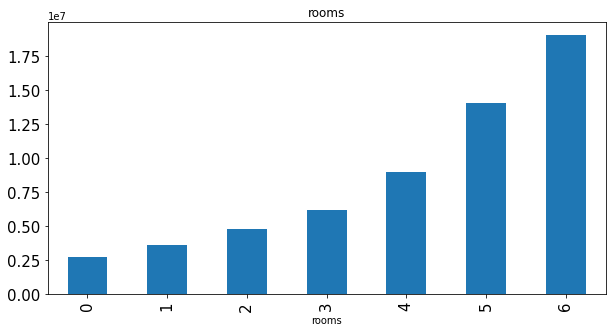

In [49]:
 #Исключим выбросы
data_rooms_filtered = data.query('rooms <= 6').groupby('rooms').median()['last_price']
data_rooms_filtered.plot(x='rooms', y='last_price', kind='bar',figsize=(10,5), title='rooms', legend=None, 
                            fontsize=15 )    

Зависимость чем больше комнат, тем выше цена наблюдается до 7 комнат. Далее - единичные значения (выбросы).

Смотрим зависимость от площади

<AxesSubplot:title={'center':'total_area'}, xlabel='total_area'>

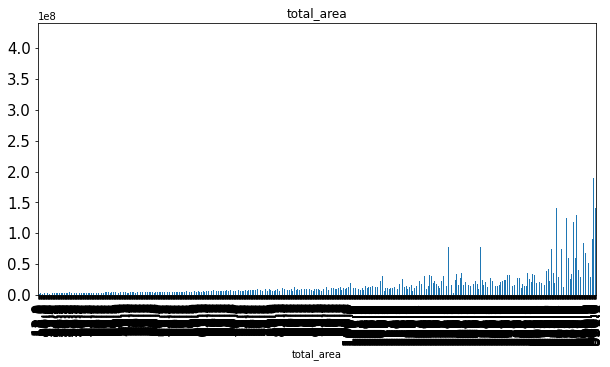

In [50]:
data_filtered = data.groupby('total_area').median()['last_price']
data_filtered.plot(x='total_area', y='last_price', kind='bar',figsize=(10,5), title='total_area', legend=None, 
                            fontsize=15 )

Чтобы лучще оценить зависимость цены от площади, предлагаю площадь квартиры поделить на категории, сщгласно данных по столбцу методом describe()
* "Более 40 м2"
* "От 41 до 52 м2"
* "От 53 до 70 м2"
* "Более 71 м2"

In [51]:
def total_area_category(total_area):
    if total_area <= 40.0:
        return 'Более 40 м2'
    if 41.0 < total_area <= 52.0:
        return 'От 41 до 52 м2'
    if 53.0 < total_area <= 70.0:
        return 'От 53 до 70 м2'
    if total_area > 71.0:
        return 'Более 71 м2'
      
data['total_area_category'] = data['total_area'].apply(total_area_category)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_m2,weekday,year,month,floor_categoria,living_area_attitude,kitchen_area_attitude,total_area_category
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,755.0,NaN,254901.960784,четверг,2019,3,другой,0.472222,0.231481,Более 71 м2
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,False,...,NaN,81.0,180107.526882,вторник,2018,12,первый,0.460396,0.272277,None
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,False,...,574.0,558.0,151486.880466,четверг,2015,8,другой,0.612500,0.148214,От 53 до 70 м2
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,False,...,234.0,424.0,NaN,пятница,2015,7,другой,NaN,NaN,Более 71 м2
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,48.0,121.0,312500.000000,вторник,2018,6,другой,0.320000,0.410000,Более 71 м2


<AxesSubplot:title={'center':'total_area_category'}, xlabel='total_area_category'>

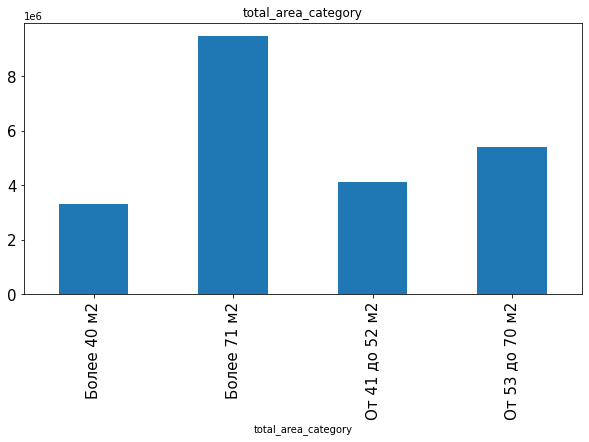

In [52]:
#Зависимость от площади
data_total_area = data.groupby('total_area_category').median()['last_price']
data_total_area.plot(x='total_area_category', y='last_price', kind='bar',figsize=(10,5), title='total_area_category', legend=None, 
                            fontsize=15 )

Чем больше площадь квартиры, тем выше ее стоимость.

Смотрим зависимость цены от этажа:

<AxesSubplot:title={'center':'floor_categoria'}, xlabel='floor_categoria'>

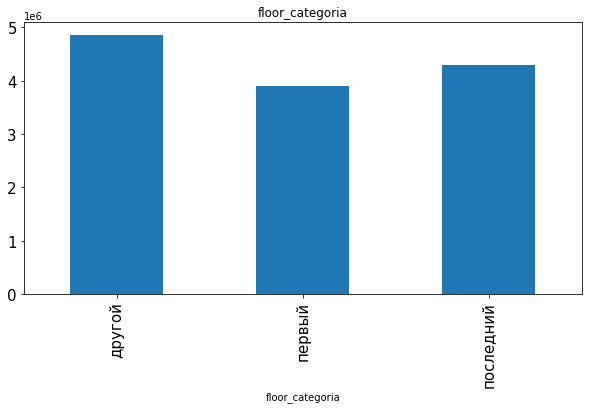

In [53]:
data_floor_filtered = data.groupby('floor_categoria').median()['last_price']
data_floor_filtered.plot(x='floor_categoria', y='last_price', kind='bar',figsize=(10,5), title='floor_categoria', legend=None, 
                            fontsize=15 )

На первом этаже самые дешевые квартиры, на последнем тоже дешевле, но не как на первом.

По удалённости от центра

<AxesSubplot:title={'center':'cityCenters_nearest'}, xlabel='cityCenters_nearest'>

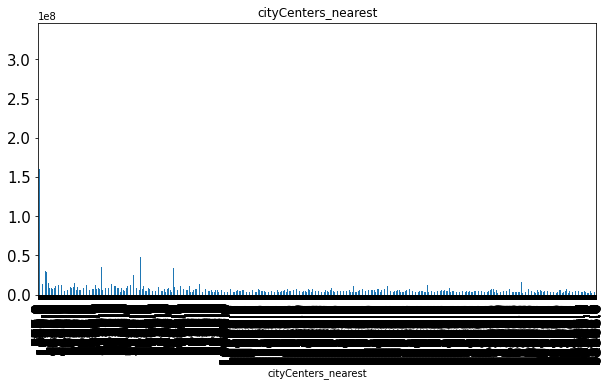

In [54]:
data_cityCenter_filtered = data.groupby('cityCenters_nearest').median()['last_price']
data_cityCenter_filtered.plot(x='cityCenters_nearest', y='last_price', kind='bar',figsize=(10,5), title='cityCenters_nearest', legend=None, 
                            fontsize=15 )

Предлагаю расстояние поделить на группы:(0-5 центр),( 5-10 За центром), (10-15 окрайна города),(15 и более Область)

In [55]:
def cityCenters_category(cityCenters_nearest):
    if cityCenters_nearest <= 5000:
        return 'Центр'
    if 5001 < cityCenters_nearest <=10000:
        return 'За центром'
    if 10001 < cityCenters_nearest <= 15000:
        return 'Окрайна города'
    if cityCenters_nearest > 15000:
        return 'Область'
      
data['cityCenters_category'] = data['cityCenters_nearest'].apply(cityCenters_category)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_m2,weekday,year,month,floor_categoria,living_area_attitude,kitchen_area_attitude,total_area_category,cityCenters_category
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,NaN,254901.960784,четверг,2019,3,другой,0.472222,0.231481,Более 71 м2,Область
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,False,...,81.0,180107.526882,вторник,2018,12,первый,0.460396,0.272277,None,Область
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,False,...,558.0,151486.880466,четверг,2015,8,другой,0.612500,0.148214,От 53 до 70 м2,Окрайна города
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,False,...,424.0,NaN,пятница,2015,7,другой,NaN,NaN,Более 71 м2,За центром
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,121.0,312500.000000,вторник,2018,6,другой,0.320000,0.410000,Более 71 м2,За центром


Смотрим зависимость цены от удалённости от центра:

<AxesSubplot:title={'center':'cityCenters_category'}, xlabel='cityCenters_category'>

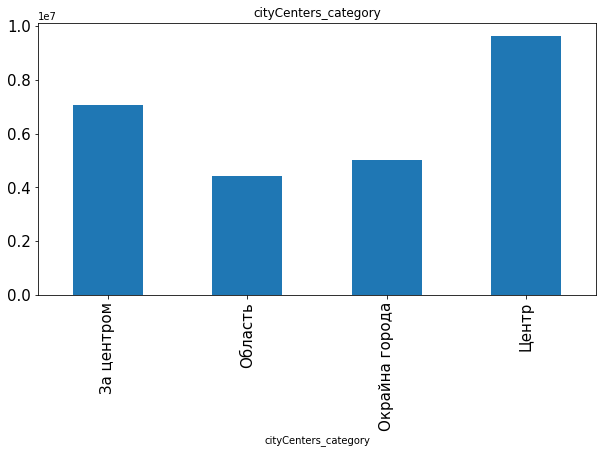

In [56]:
data_filtered = data.groupby('cityCenters_category').median()['last_price']
data_filtered.plot(x='cityCenters_category', y='last_price', kind='bar',figsize=(10,5), title='cityCenters_category', legend=None, 
                            fontsize=15 )

Чем дальше квартира от центра, тем стоимость ее дешевле.

Изучем зависимость цены от дня недели, месяца и года.

Посмотрим (медиану) зависимость цены от дня недели

<AxesSubplot:title={'center':'weekday'}, xlabel='weekday'>

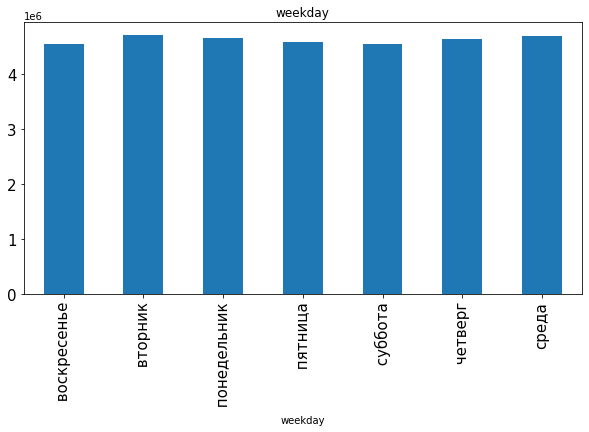

In [57]:
data_weekday_filtered = data.groupby('weekday').median()['last_price']
data_weekday_filtered.plot(x='weekday', y='last_price', kind='bar',figsize=(10,5), title='weekday', legend=None, 
                            fontsize=15 )

Квартиры, размещенные к продаже в будние дни, практически не отличаются от цен в выходные.

Посмотрим (медиану) зависимость цены от месяца

<AxesSubplot:title={'center':'month'}, xlabel='month'>

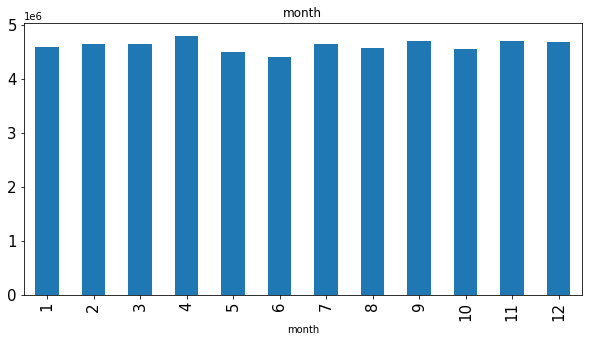

In [58]:
data_month_filtered = data.groupby('month').median()['last_price']
data_month_filtered.plot(x='month', y='last_price', kind='bar',figsize=(10,5), title='month', legend=None, 
                            fontsize=15 )

Квартиры, размещенные к продаже в мае и июне в среднем дешевле, чем размещенные в любые другие месяца. В начале и в конце года цены выше

Посмотрим (медиану) зависимость цены от года

<AxesSubplot:title={'center':'year'}, xlabel='year'>

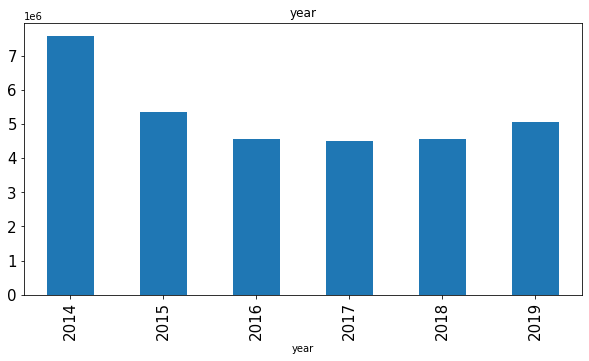

In [59]:
data_year_filtered = data.groupby('year').median()['last_price']
data_year_filtered.plot(x='year', y='last_price', kind='bar',figsize=(10,5), title='year', legend=None, 
                            fontsize=15 )

Квартиры, размещенные к продаже в 2014 году, дороже всех. Период 2015-2018 - период низких цен на квартиры. 2019г - цены пошли вверх.

4.5 Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Данные берем из столбца locality_name.


In [60]:
data_grouped = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False)[:10]
data_grouped


locality_name
Санкт-Петербург      15731
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             397
Пушкин                 369
Колпино                337
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 234
Name: locality_name, dtype: int64

In [61]:
city=['Санкт-Петербург','посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино ', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']
data_top10 = data.query('locality_name in @city') # Отфильтруем таблицу real_estate_data, оставив там только нужные нам населенные пункты
mean10_metr = data_top10.groupby('locality_name')['price_m2'].mean().sort_values(ascending=False).astype('int')#Сгруппируем, чтобы посчитать среднее
mean10_price =data_top10.groupby('locality_name')['last_price'].mean().sort_values(ascending=False).astype('int')
frame = {'Средняя цена за кв.м., руб.': mean10_metr, 'Средняя цена за квартиру, руб.': mean10_price}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м., руб.', ascending=False)
dataframe


,"Средняя цена за кв.м., руб.","Средняя цена за квартиру, руб."
locality_name,,
Санкт-Петербург,214720,8042525
посёлок Парголово,200715,4488074
Пушкин,192258,6469035
деревня Кудрово,188191,4234157
посёлок Мурино,177394,3672049
посёлок Шушары,156336,4108081
Всеволожск,133547,3779720
Гатчина,121750,3488336
Выборг,98518,3195653


Чем дальше от города, тем дешевле. В Выборге средняя цена за квадратный метр в 2 раз ниже, чем в Санкт-Петербурге.

4.6 Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.


In [62]:
import warnings
warnings.filterwarnings("ignore")
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb['cityCenters_km'] = (data_spb['cityCenters_nearest']/1000).round()
data_spb.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_m2,weekday,year,month,floor_categoria,living_area_attitude,kitchen_area_attitude,total_area_category,cityCenters_category,cityCenters_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,254901.960784,четверг,2019,3,другой,0.472222,0.231481,Более 71 м2,Область,16.0
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,False,...,151486.880466,четверг,2015,8,другой,0.612500,0.148214,От 53 до 70 м2,Окрайна города,14.0
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,False,...,NaN,пятница,2015,7,другой,NaN,NaN,Более 71 м2,За центром,7.0
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,312500.000000,вторник,2018,6,другой,0.320000,0.410000,Более 71 м2,За центром,8.0
7,5,7915000,71.6,2019-04-18,2,2.6,24,NaN,22,False,...,NaN,четверг,2019,4,другой,NaN,0.263966,Более 71 м2,Окрайна города,12.0


Строим график медианной цены в зависимости от удаленности от города:

<AxesSubplot:title={'center':'cityCenters_km'}, xlabel='cityCenters_km'>

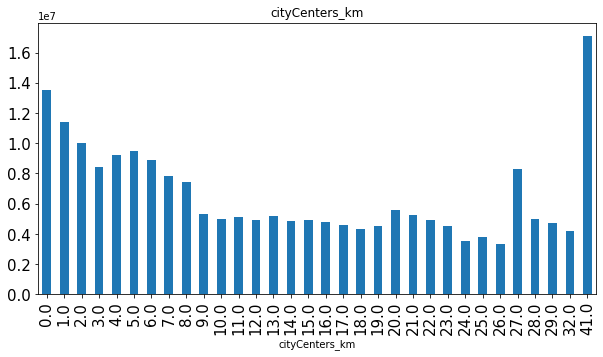

In [63]:
data_cityCenters = data_spb.groupby('cityCenters_km').median()['last_price']
data_cityCenters.plot(x='cityCenters_km', y='last_price', kind='bar',figsize=(10,5), title='cityCenters_km', legend=None, 
                            fontsize=15 )

Ожидаемо, что в самом центре (в радиусе до 1 км) медианная цена на квартиру стремится к 15 млн р. Если опираться на резкое падение цены по графику, то центр ограничен радиусом в 8 км, далее медианная цена довольно заметно падает. Однако, цены на 4-8 км сравнимы с ценами на квартиры, расположенные в 2 км от центра. Предположительно на это влияет в каком районе квартира находится.

4.7 Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?


Воспользуемся функцией corr() и посмотрим, как влияют определенные параметры квартиры на её финальную цену.

In [64]:
#Выделим сегмент квартир в центральной зоне (до 8 км включительно) 
data_center = data_spb.query('cityCenters_nearest <= 8000')

In [65]:
data_center.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,year,month,living_area_attitude,kitchen_area_attitude,cityCenters_km
total_images,1.000000,0.131720,0.096669,0.050548,0.066146,-0.025271,0.078698,0.011019,NaN,-0.031068,...,-0.051948,0.005473,-0.006965,-0.036133,0.086255,0.137084,-0.010739,-0.038707,0.042751,0.009810
last_price,0.131720,1.000000,0.635820,0.333563,0.068616,0.044567,0.537706,0.125079,NaN,-0.022871,...,-0.043108,0.104635,-0.077425,0.055061,0.357985,-0.037308,-0.008278,-0.018906,-0.091474,-0.044656
total_area,0.096669,0.635820,1.000000,0.740310,0.125604,-0.020491,0.938982,0.102936,NaN,-0.053872,...,-0.069069,0.027453,-0.075041,0.129703,0.103772,-0.069660,-0.017919,0.135943,-0.316301,-0.097553
rooms,0.050548,0.333563,0.740310,1.000000,0.102424,-0.182723,0.826726,-0.038437,NaN,-0.116066,...,-0.102071,-0.019342,-0.054763,0.136818,-0.050076,-0.063139,-0.021421,0.407611,-0.489954,-0.166761
ceiling_height,0.066146,0.068616,0.125604,0.102424,1.000000,-0.152057,0.140503,-0.084397,NaN,0.015316,...,-0.098136,0.043655,-0.028355,0.068226,0.010474,0.040792,-0.017195,0.062758,-0.049961,-0.129981
floors_total,-0.025271,0.044567,-0.020491,-0.182723,-0.152057,1.000000,-0.128334,0.670757,NaN,0.002887,...,0.195683,-0.040814,0.016087,-0.004040,0.096191,-0.040003,0.024528,-0.336333,0.182493,0.373597
living_area,0.078698,0.537706,0.938982,0.826726,0.140503,-0.128334,1.000000,0.017954,NaN,-0.041582,...,-0.089593,0.027447,-0.065464,0.127376,-0.011483,-0.062722,-0.013304,0.409799,-0.451553,-0.149793
floor,0.011019,0.125079,0.102936,-0.038437,-0.084397,0.670757,0.017954,1.000000,NaN,-0.015567,...,0.127528,-0.044691,-0.001337,-0.005129,0.092885,-0.028502,0.023491,-0.199744,0.058291,0.243895
is_apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studio,-0.031068,-0.022871,-0.053872,-0.116066,0.015316,0.002887,-0.041582,-0.015567,NaN,1.000000,...,-0.011493,0.012777,0.018843,-0.037798,-0.008204,0.014276,0.012756,0.061332,NaN,0.006068


Выделим только столбец last_price, чтоб детальней рассмотреть влияние различных параметров именно на цену:

In [66]:
data_center.corr()[['last_price']].sort_values(by='last_price', ascending=False)

,last_price
last_price,1.000000
total_area,0.635820
living_area,0.537706
kitchen_area,0.506451
price_m2,0.357985
rooms,0.333563
total_images,0.131720
floor,0.125079
parks_around3000,0.106498
ponds_around3000,0.104635


Если опираться на резкое падение цены по графику  в задании 4.6, то центр ограничен радиусом в 8 км. 

In [67]:
#Выделим сегмент квартир в центральной зоне (до 8 км включительно) 
data_center = data.query('cityCenters_nearest <= 8000')

In [68]:
data_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_m2,weekday,year,month,floor_categoria,living_area_attitude,kitchen_area_attitude,total_area_category,cityCenters_category
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,False,...,424.0,NaN,пятница,2015,7,другой,NaN,NaN,Более 71 м2,За центром
24,8,6500000,97.2,2015-10-31,2,2.6,3,46.5,1,False,...,265.0,1.397849e+05,суббота,2015,10,первый,0.478395,0.201646,Более 71 м2,Центр
35,6,15500000,149.0,2017-06-26,5,2.6,5,104.0,4,False,...,644.0,1.490385e+05,понедельник,2017,6,другой,0.697987,0.114094,Более 71 м2,Центр
51,7,45000000,161.0,2017-10-17,3,3.2,8,38.0,4,False,...,541.0,1.184211e+06,вторник,2017,10,другой,0.236025,0.310559,Более 71 м2,За центром
52,20,11795000,136.0,2017-09-22,6,3.0,2,94.0,2,False,...,NaN,1.254787e+05,пятница,2017,9,последний,0.691176,0.080882,Более 71 м2,За центром


 Изучем следующие параметры: площадь, цена, число комнат, высота потолков.

In [69]:
data_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,3715.000000,3.715000e+03,3715.000000,3715.000000
mean,92.152624,1.465376e+07,2.813997,2.925787
std,60.062645,2.464301e+07,1.453504,0.728353
min,12.000000,1.600000e+06,0.000000,2.000000
25%,56.000000,6.550000e+06,2.000000,2.600000
50%,77.800000,9.000000e+06,3.000000,2.800000
75%,108.650000,1.402500e+07,3.000000,3.100000
max,900.000000,7.630000e+08,19.000000,32.000000


По площади есть как квартира 12 кв.м., так и 900 кв.м. Как и в общед таблице, Эти квартиры оказались в центрею В среднем 90 м2; по цене за квартиру - есть варианты и за 1600 тысяч рублей, есть за 763 млн; число комнат - от 0 до 19. 0- Возможно, это нежилые помещения; высота потолков - от 2 до 32 метров.

[[<AxesSubplot:title={'center':'total_area'}>]]
[[<AxesSubplot:title={'center':'last_price'}>]]
[[<AxesSubplot:title={'center':'rooms'}>]]
[[<AxesSubplot:title={'center':'ceiling_height'}>]]


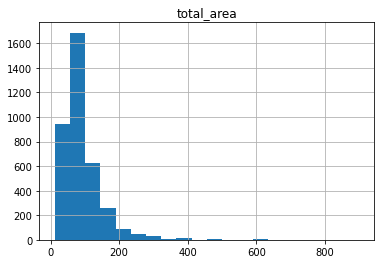

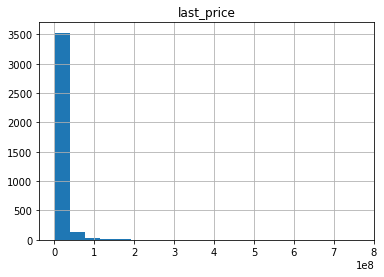

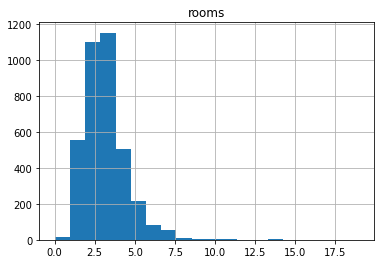

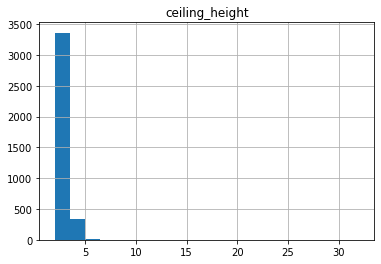

In [70]:
#Построим гистограмму для площади
#Построим гистограмму для цены
#Построим гистограмму для числа комнат
#Построим гистограмму для высоты потолка
print(data_center.hist('total_area', bins=20))
print(data_center.hist('last_price', bins=20))
print(data_center.hist('rooms', bins=20))
print(data_center.hist('ceiling_height', bins=20))

<AxesSubplot:>

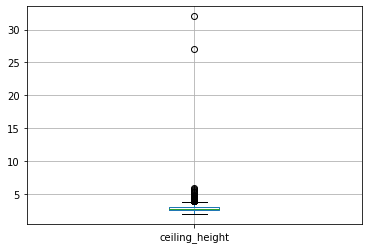

In [71]:
#Построим боксплот, чтобы визуально посмотреть на выбросы
data_center.boxplot(column='ceiling_height')

 Предлагаю удалить редкие и выбивающие значения 'ceiling_height' и посмотреть на гистограмму '2 < ceiling_height <= 4'

AxesSubplot(0.125,0.125;0.775x0.755)


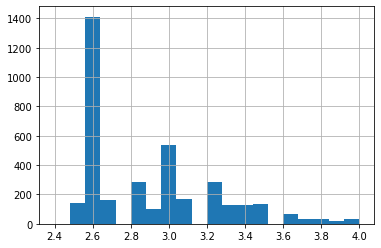

In [72]:
print(data_center.query('2 <ceiling_height <= 4')['ceiling_height'].hist( bins=20))

<AxesSubplot:>

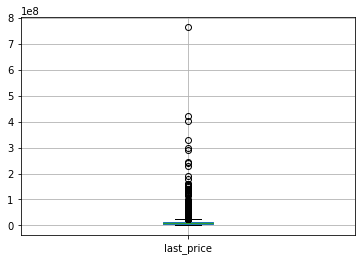

In [73]:
#Построим боксплот, чтобы визуально посмотреть на выбросы
data_center.boxplot(column='last_price')

Предлагаю удалить редкие и выбивающие значения 'last_price' и посмотреть на гистограмму ' 1600000< last_price <= 14000000'

AxesSubplot(0.125,0.125;0.775x0.755)


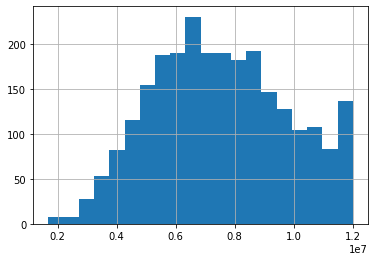

In [74]:
print(data_center.query(' 1600000< last_price <= 12000000')['last_price'].hist( bins=20))

<AxesSubplot:>

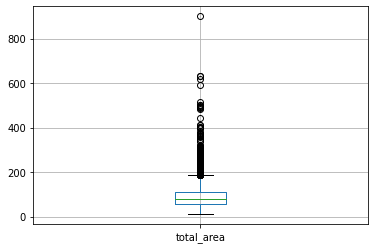

In [75]:
#Построим боксплот, чтобы визуально посмотреть на выбросы
data_center.boxplot(column='total_area')

Предлагаю удалить редкие и выбивающие значения 'last_price' и посмотреть на гистограмму ' 50 < total_area <= 180 '

AxesSubplot(0.125,0.125;0.775x0.755)


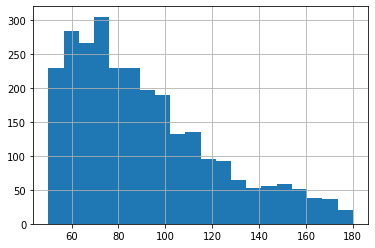

In [76]:
print(data_center.query(' 50 < total_area <= 180 ')['total_area'].hist( bins=20))

Смотрим зависимость цены от количества комнат в центре:

<AxesSubplot:title={'center':'rooms'}, xlabel='rooms'>

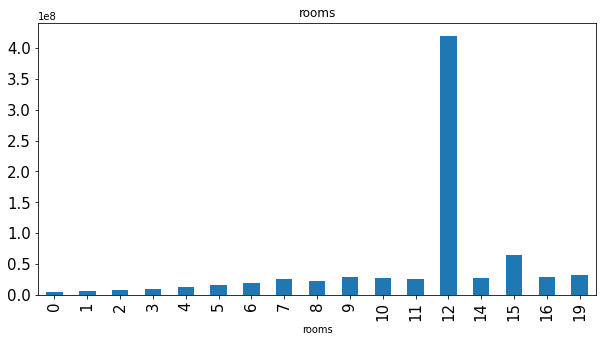

In [77]:
data_rooms = data_center.groupby('rooms').median()['last_price']
data_rooms.plot(x='rooms', y='last_price', kind='bar',figsize=(10,5), title='rooms', legend=None, fontsize=15 )

<AxesSubplot:>

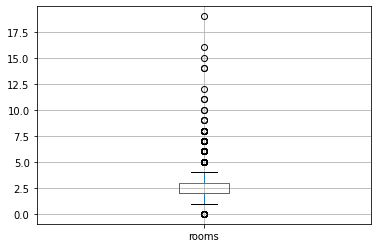

In [78]:
#Посмотрим на выбросы:
data_center.boxplot(column='rooms')

<AxesSubplot:title={'center':'rooms'}, xlabel='rooms'>

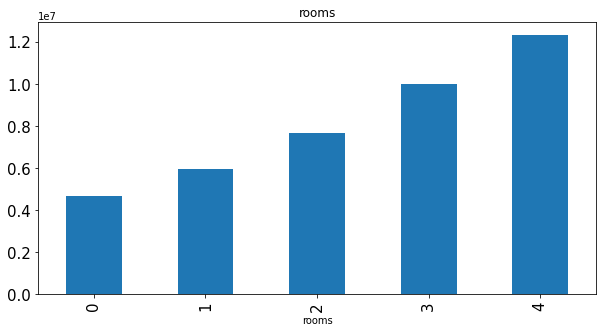

In [79]:
 #Исключим выбросы
data_rooms_filtered = data_center.query('rooms <= 4').groupby('rooms').median()['last_price']
data_rooms_filtered.plot(x='rooms', y='last_price', kind='bar',figsize=(10,5), title='rooms', legend=None, 
                            fontsize=15 )    

Зависимость: чем больше комнат, тем выше цена наблюдается до 4 комнат. Далее - единичные значения (выбросы).

Оценим цену в зависимости от этажа

In [80]:
data_center['floor_categoria'] = np.where(data_center['floor'] == 1, 'первый', 'другой')
data_center['floor_categoria'] = np.where(data_center['floor'] == data_center['floors_total'], 'последний', data_center['floor_categoria'])

<AxesSubplot:title={'center':'floor_categoria'}, xlabel='floor_categoria'>

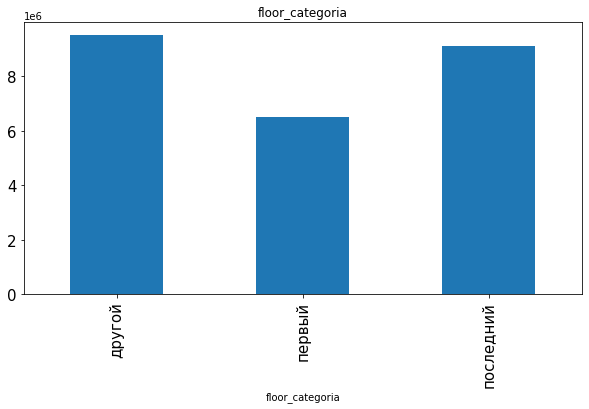

In [81]:
data_floor_center = data_center.groupby('floor_categoria').median()['last_price']
data_floor_center.plot(x='floor_categoria', y='last_price', kind='bar',figsize=(10,5), title='floor_categoria', legend=None, 
                            fontsize=15 )

На первом этаже самые дешевые квартиры, на последнем тоже дешевле, но не как на первом.

По удалённости от центра

In [82]:
def cityCenters_category(cityCenters_nearest):
    if cityCenters_nearest <= 1000:
        return '1 км'
    if 1001 < cityCenters_nearest <=2000:
        return '2 км'
    if 2001 < cityCenters_nearest <= 3000:
        return '3 км'
    if 3001 < cityCenters_nearest <=4000:
        return '4 км'
    if 4001 < cityCenters_nearest <= 5000:
        return '5 км'
    if 5001 < cityCenters_nearest <=6000:
        return '6 км'
    if 6001 < cityCenters_nearest <= 7000:
        return '7 км'
    if cityCenters_nearest > 7001:
        return '8 км'     
data['cityCenters_category'] = data['cityCenters_nearest'].apply(cityCenters_category)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_m2,weekday,year,month,floor_categoria,living_area_attitude,kitchen_area_attitude,total_area_category,cityCenters_category
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,NaN,254901.960784,четверг,2019,3,другой,0.472222,0.231481,Более 71 м2,8 км
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,False,...,81.0,180107.526882,вторник,2018,12,первый,0.460396,0.272277,None,8 км
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,False,...,558.0,151486.880466,четверг,2015,8,другой,0.612500,0.148214,От 53 до 70 м2,8 км
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,False,...,424.0,NaN,пятница,2015,7,другой,NaN,NaN,Более 71 м2,7 км
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,121.0,312500.000000,вторник,2018,6,другой,0.320000,0.410000,Более 71 м2,8 км


In [83]:
data_center = data.query('cityCenters_nearest <= 8000')

<AxesSubplot:title={'center':'cityCenters_category'}, xlabel='cityCenters_category'>

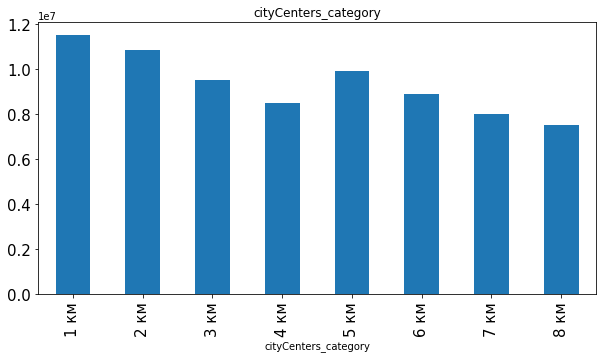

In [84]:
data_filtered = data_center.groupby('cityCenters_category').median()['last_price']
data_filtered.plot(x='cityCenters_category', y='last_price', kind='bar',figsize=(10,5), title='cityCenters_category', legend=None, 
                            fontsize=15 )

Ожидаемо, что в самом центре (в радиусе до 1 км)квартиры самые дорогие. а так чем дальше от центра, тем дешевле

Изучем зависимость цены от дня недели, месяца и года.

Посмотрим (медиану) зависимость цены от дня недели

In [85]:
data_center['weekday'] = pd.DatetimeIndex(data_center['first_day_exposition']).weekday

In [86]:
dict_weekdays = {0: ' понедельник', 1: ' вторник', 2: 'среда', 3: ' четверг', 
                    4: ' пятница', 5: ' суббота', 6: ' воскресенье'}

In [87]:
data_center['weekday'] = data_center['weekday'].map(dict_weekdays)

<AxesSubplot:title={'center':'weekday'}, xlabel='weekday'>

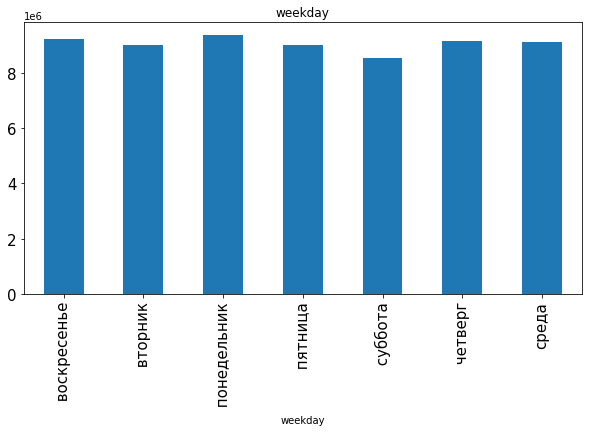

In [88]:
data_weekday_filtered = data_center.groupby('weekday').median()['last_price']
data_weekday_filtered.plot(x='weekday', y='last_price', kind='bar',figsize=(10,5), title='weekday', legend=None, 
                            fontsize=15 )

Квартиры, размещенные к продаже в будние дни, практически не отличаются от цен в выходные. Если только в субботу, меньше всего продаж

Посмотрим (медиану) зависимость цены от месяца

<AxesSubplot:title={'center':'month'}, xlabel='month'>

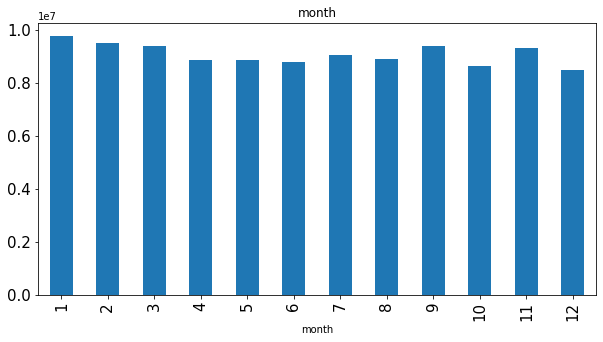

In [89]:
data_center['month'] = pd.DatetimeIndex(data_center['first_day_exposition']).month
data_month_filtered = data_center.groupby('month').median()['last_price']
data_month_filtered.plot(x='month', y='last_price', kind='bar',figsize=(10,5), title='month', legend=None, 
                            fontsize=15 )

Квартиры, размещенные к продаже в апреле, мае, июне, октябре и декабре в среднем дешевле, чем размещенные в любые другие месяца. В начале года цены высокие


Посмотрим (медиану) зависимость цены от года

<AxesSubplot:title={'center':'year'}, xlabel='year'>

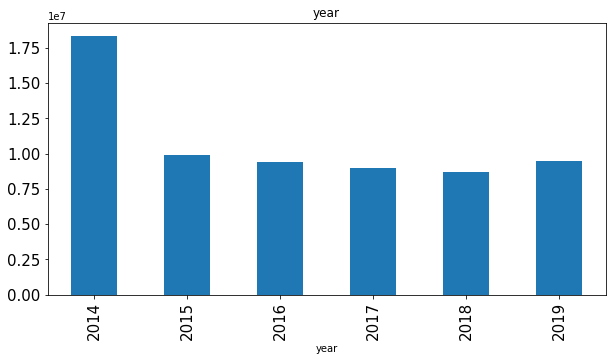

In [90]:
data_center['year'] = pd.DatetimeIndex(data_center['first_day_exposition']).year
data_year_filtered = data_center.groupby('year').median()['last_price']
data_year_filtered.plot(x='year', y='last_price', kind='bar',figsize=(10,5), title='year', legend=None, 
                            fontsize=15 )

Квартиры, размещенные к продаже в 2014 году, дороже всех. Период 2015-2018 - период низких цен на квартиры. 2019г - цены пошли вверх. Все так же как и не только в центре.

При сравнении данных по центру и данных по всей базе могу сказать, что данные особо не отличаются, зависимость наблюдается такая же, что и по всей базе.

Из данных выше, мы можем сказать, что сильнее всего цена на квартиру зависит от общей площади квартиры (чем больше площадь, тем выше цена), от площади жилой площади и площади кухни, от стоимости м2, количества комнат, количество фотографий в объявлении и какой этаж. Небольшое влияние оказывает присутствие парков/водоемов рядом.
Также влияние оказывает удаленность от центра - чем дальше от центра, тем ниже цена. Таким же образом небольшое влияние оказывает удаленность от аэропорта.

## Общий вывод

* Чем больше площадь квартиры, тем выше цена	
* Чем больше цена за квадратный метр, тем выше цена	
* Чем выше доля жилой площади/площадь кухни, тем выше цена	
* Чем больше комнат, тем выше цена	
* На первом этаже квартира дешевле, чем на остальных; на последнем дороже, чем на первом, но дешевле, чем на остальных	
* Чем ближе к центру, тем дороже квартира. В самом центре (< 1 км до центра) квартиры стоят на порядок дороже, чем на более удаленных.	
* Квартиры, размещенные к продаже в будние дни, практически не отличаются от цен в выходные.	
* Квартиры, размещенные к продаже в мае и июне в среднем дешевле, чем размещенные в любые другие месяца. В начале и в конце года цены выше.	
* Квартиры, размещенные к продаже в 2014 году, дороже всех. Период 2015-2018 - период низких цен на квартиры. 2019г - цены пошли вверх.